In [1]:
import math as m

import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    np,
    deepcopy,
)

from utils import (
    norm_1_vec,
    norm_1,
    norm_2_vec,
    norm_2,
    norm_3_vec,
    norm_3,
    norm_spectral,
    count_norms,
)


# вариант 15. Онбаев Бауржан


## Решение СЛАУ. Ax = y


In [2]:
eps = 1e-3


In [3]:
# 15 вариант
A = np.array(
    [
        [0.63, -1.72, 3.37],
        [-1.72, -2.27, 1.62],
        [3.37, 1.62, -0.43],
    ]
)
x_init = np.full(3, 0.0).reshape(-1, 1)
y = np.array([-0.75, 1.27, 2.74]).reshape(-1, 1)


In [4]:
exact_x = np.linalg.inv(A) @ y
exact_x


array([[ 2.84182382],
       [-5.11311051],
       [-3.36347154]])

код в вольфрам для нахождения матрицы U
```
u_11^2+u_12^2+u_13^2 = 0.63, u_12*u_22+u_13*u_23 = -1.72, u_13 * u_33 = 3.37, u_22 ^2 + u_23 ^ 2 = -2.27, u_23 * u_33 = 1.62, u_33 ^ 2 = -0.43
```

код в вольфрам для нахождения z
```
33iz_3/50 = 2.74, -1.96z_2 - 2.47iz_3 = 1.27, -2.09iz_1 - 5.6z_2 - 5.14iz_3 = -0.75
```

код в вольфрам для нахождения x
```
-2.09ix_1 = -5.9i, -(140x_1 + 49x_2) / 25 = -5.88, - (514ix_1 + 247ix_2 - 66ix_3) / 100 = -4.15i
```


In [5]:
x = np.array([2.82, -5.07, -3.26]).reshape(-1, 1)
x


array([[ 2.82],
       [-5.07],
       [-3.26]])

In [6]:
# норма разницы между точным ответом и тем,
# что получился у меня при решении методом квадратного корня
display(
    norm_1_vec(x - exact_x),
    norm_2_vec(x - exact_x),
    norm_3_vec(x - exact_x),
)


0.10347153733111503

0.16840586381991285

0.11419787233444563

## 2-ое задание на метод итераций для СЛАУ

In [7]:
B = np.array(
    [
        [0.23, -0.14, 0.06, -0.12],
        [0.12, 0, 0.32, -0.18],
        [0.08, -0.12, 0.23, 0.32],
        [0.25, 0.22, 0.14, 0.0],
    ]
)
b = np.array([1.21, -0.72, -0.58, 1.56]).reshape(-1, 1)


In [8]:
print(f"B\n{B}", end="\n" * 2)
print(f"b\n{b}")


B
[[ 0.23 -0.14  0.06 -0.12]
 [ 0.12  0.    0.32 -0.18]
 [ 0.08 -0.12  0.23  0.32]
 [ 0.25  0.22  0.14  0.  ]]

b
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


In [9]:
q_collection = count_norms(B)
# нормы меньше 1, то метод сходится
# работать буду с 1-ой нормой
q = q_collection[0]


1-ая норма: 0.75
2-ая норма: 0.75
3-ая норма: 0.5155893972709307


In [10]:
def mi(B, b, x):
    return B @ x + b


In [11]:
# метод сходится при любой начальной инициализации x, так что положим x=0
x_0 = np.zeros(4).reshape(-1, 1)
x = mi(B, b, x_0)

print(f"x_0\n{x_0}")
print(f"x_1\n{x}")


x_0
[[0.]
 [0.]
 [0.]
 [0.]]
x_1
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


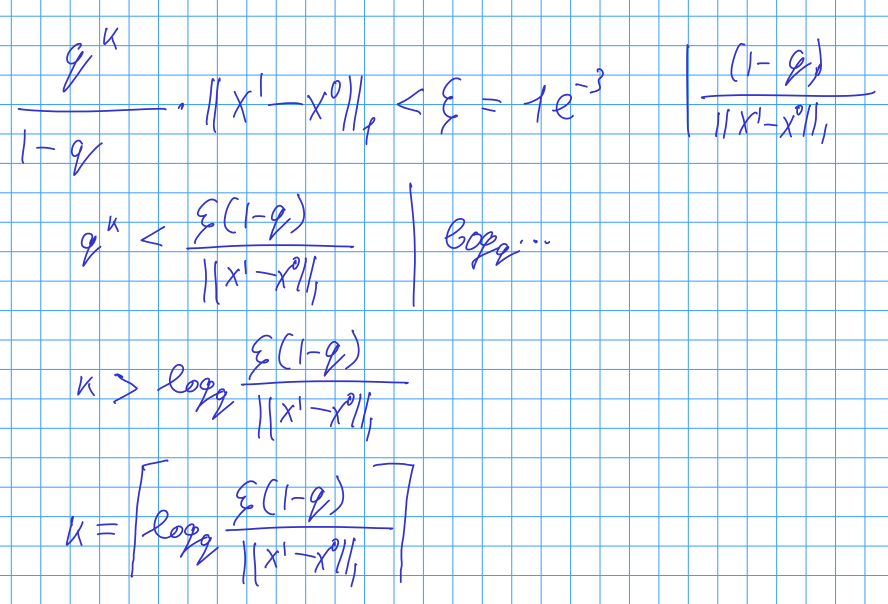

In [12]:
n1 = norm_1_vec(x - x_0)

k = m.ceil(np.log(eps * (1 - q) / n1) / np.log(q))
print(f"k = {k}")


k = 31


In [13]:
# будем считать решение с очень большим приближением эталонным
exact_x = x_0.copy()
for _ in range(int(1e4)):
    exact_x = mi(B, b, exact_x)


In [14]:
x = x_0.copy()
norms = []

for _ in range(k):
    x = mi(B, b, x)
    norms.append(norm_1_vec(x - exact_x))


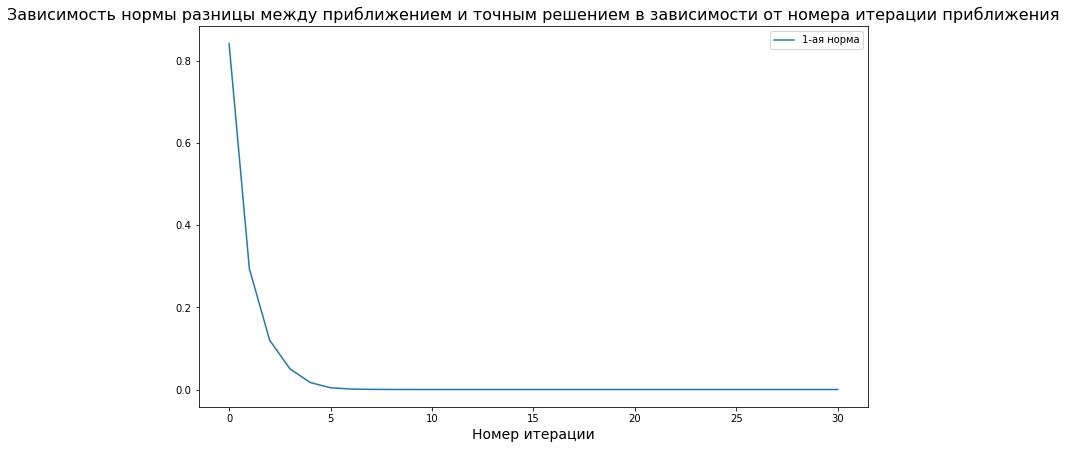

In [15]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(k)), y=norms, label="1-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и точным решением в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()


### Ответ (2-ое задание на метод итераций)

In [16]:
print(f"ответ:\n{x}")


ответ:
[[ 1.45558303]
 [-0.78300921]
 [ 0.26327984]
 [ 1.78849291]]


## 3-е задание. Метод Зейделя 1-ый вариант



*   List item
*   List item

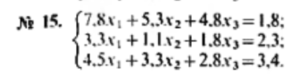

In [24]:
# Ax = y

A = np.array(
    [
        [7.8, 5.3, 4.8],
        [3.3, 1.1, 1.8],
        [4.5, 3.3, 2.8],
    ]
)
y = np.array([1.8, 2.3, 3.4]).reshape(-1, 1)

exact_x = np.linalg.inv(A) @ y


count_norms(A)


# A[0] = A[0] / (A[0].max() - A[0].min())
# A[1] = A[1] / (A[1].max() - A[1].min())
# A[2] = A[2] / (A[2].max() - A[2].min())

coef = 1

A /= coef
y /= coef

count_norms(A)


1-ая норма: 17.9
2-ая норма: 15.6
3-ая норма: 12.860093032062853
1-ая норма: 17.9
2-ая норма: 15.6
3-ая норма: 12.860093032062853


array([17.9       , 15.6       , 12.86009303])

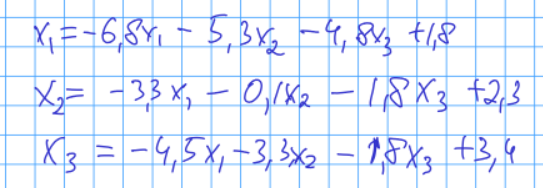

In [27]:
B = np.copy(A)

B[0, 0] -= 1
B[1, 1] -= 1
B[2, 2] -= 1


b = np.copy(y)


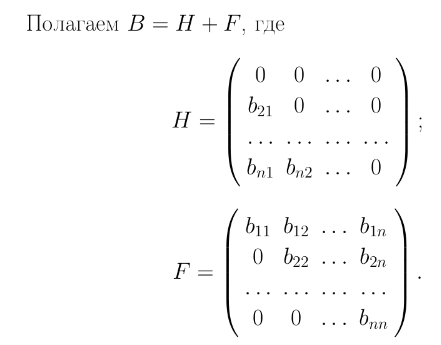

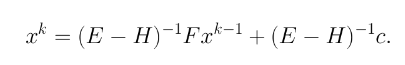

In [35]:
F = np.triu(B)
H = B - F

B_ = np.linalg.inv(np.eye(B.shape[0]) - H) @ F
b_ = np.linalg.inv(np.eye(B.shape[0]) - H) @ b


In [36]:
B_


array([[  6.8  ,   5.3  ,   4.8  ],
       [ 22.44 ,  17.59 ,  17.64 ],
       [104.652,  81.897,  81.612]])

In [37]:
b_


array([[ 1.8  ],
       [ 8.24 ],
       [38.692]])

In [38]:
B_ /= 1000
B_


array([[0.0068  , 0.0053  , 0.0048  ],
       [0.02244 , 0.01759 , 0.01764 ],
       [0.104652, 0.081897, 0.081612]])

In [32]:
# B_[0] += B_[1] * (1 / 3) + B_[2] * (1 / 3)
# B_[1] += -B_[0] * (1 / 7) + B_[2] * (1 / 7)
# B_[2] += -B_[0] * (1 / 5) - B_[1] * (1 / 10)

# b_[0] += b_[1] * (1 / 3) + b_[2] * (1 / 3)
# b_[1] += -b_[0] * (1 / 7) + b_[2] * (1 / 7)
# b_[2] += -b_[0] * (1 / 5) - b_[1] * (1 / 10)


In [39]:
# посмотрим на нормы матрицы B_
q_collection = count_norms(B_)
q = q_collection[1]
q


1-ая норма: 0.268161
2-ая норма: 0.133892
3-ая норма: 0.15981548375027863


0.133892

In [45]:
x_0 = np.zeros(B_.shape[0]).reshape(-1, 1)
x_1 = mi(B_, b_, x_0)
x_0, x_1


(array([[0.],
        [0.],
        [0.]]),
 array([[ 1.8  ],
        [ 8.24 ],
        [38.692]]))

In [46]:
norms = [[] for _ in range(3)]

iterations = int(1e3)
x = np.copy(x_0)
for _ in range(iterations):
    x = mi(B_, b_, x)
    norms[0].append(norm_1_vec(x - exact_x))
    norms[1].append(norm_2_vec(x - exact_x))
    norms[2].append(norm_3_vec(x - exact_x))


In [61]:
x_ = mi(B_, b_, np.zeros(3).reshape(-1, 1))
x_


array([[ 1.8  ],
       [ 8.24 ],
       [38.692]])

In [72]:
x_ = mi(B_, b_, x_)
x_


array([[ 2.07019219],
       [ 9.21029288],
       [43.18756899]])

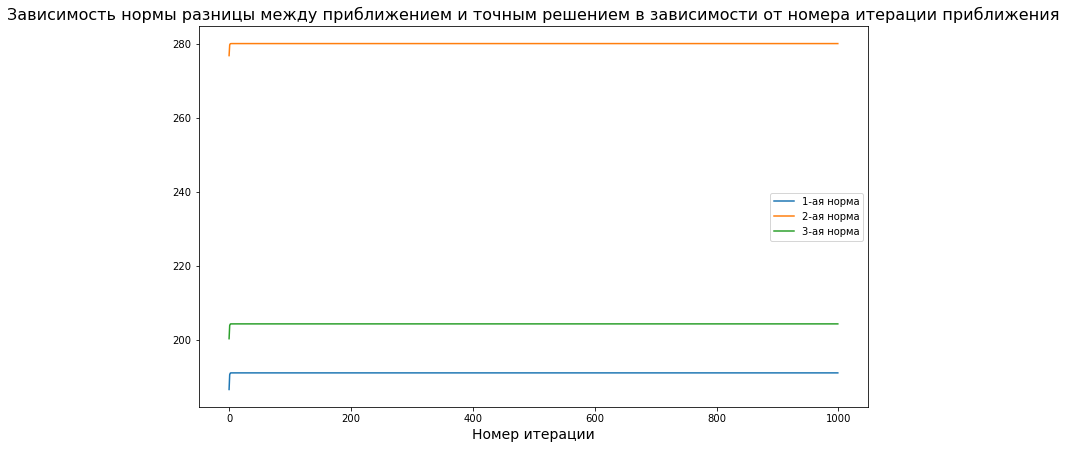

In [74]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и точным решением в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()
